In [1]:
# packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

%cd Downloads



# Now we need to read in the data
df = pd.read_csv('chip_dataset.csv')

C:\Users\niyaz\Downloads


In [2]:
df.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [3]:
#Dropping Unnamed: 0 Column 
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [5]:
# Rename specific columns
df.rename(columns={'Release Date': 'Release_Date', 'Process Size (nm)': 'Process_Size_nm','TDP (W)' : 'TDP_W',
       'Die Size (mm^2)' : 'Die_Size_mm^2', 'Transistors (million)' : 'Transistors_million', 'Freq (MHz)': 'Freq_MHz', 'FP16 GFLOPS': 'FP16_GFLOPS', 'FP32 GFLOPS' : 'FP32_GFLOPS', 'FP64 GFLOPS' : 'FP64_GFLOPS' }, inplace=True)

# Updated DataFrame
df.columns
# Output: Index(['Product', 'Type', 'Release_Date', 'Process_Size_nm', ...], dtype='object')

Index(['Product', 'Type', 'Release_Date', 'Process_Size_nm', 'TDP_W',
       'Die_Size_mm^2', 'Transistors_million', 'Freq_MHz', 'Foundry', 'Vendor',
       'FP16_GFLOPS', 'FP32_GFLOPS', 'FP64_GFLOPS'],
      dtype='object')

In [6]:
df.dtypes

Product                 object
Type                    object
Release_Date            object
Process_Size_nm        float64
TDP_W                  float64
Die_Size_mm^2          float64
Transistors_million    float64
Freq_MHz               float64
Foundry                 object
Vendor                  object
FP16_GFLOPS            float64
FP32_GFLOPS            float64
FP64_GFLOPS            float64
dtype: object

In [7]:
#Checking for null values in each column
df.isnull().sum()

Product                   0
Type                      0
Release_Date              0
Process_Size_nm           9
TDP_W                   626
Die_Size_mm^2           715
Transistors_million     711
Freq_MHz                  0
Foundry                   0
Vendor                    0
FP16_GFLOPS            4318
FP32_GFLOPS            2906
FP64_GFLOPS            3548
dtype: int64

In [8]:
# Replace 'NaT' strings with actual NaT values 
df['Release_Date'] = df['Release_Date'].replace('NaT', pd.NaT)

# Count the number of rows with NaT in 'Release Date'
count_naT_release_date = df['Release_Date'].isna().sum()

# Display the count
print("Number of rows with NaT in 'Release Date':", count_naT_release_date)

Number of rows with NaT in 'Release Date': 75


In [9]:
df.describe()

,Process_Size_nm,TDP_W,Die_Size_mm^2,Transistors_million,Freq_MHz,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPS
count,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


In [10]:
df.nunique()

Product                4278
Type                      2
Release_Date           1356
Process_Size_nm          22
TDP_W                   200
Die_Size_mm^2           191
Transistors_million     196
Freq_MHz                527
Foundry                  10
Vendor                    5
FP16_GFLOPS             343
FP32_GFLOPS             821
FP64_GFLOPS             672
dtype: int64

In [11]:
df_no_date_missing = df.dropna(subset=['Release_Date'])
df_no_date_missing['Release_Date'] = pd.to_datetime(df_no_date_missing['Release_Date'])

In [12]:
df_no_date_missing

,Product,Type,Release_Date,Process_Size_nm,TDP_W,Die_Size_mm^2,Transistors_million,Freq_MHz,Foundry,Vendor,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


In [13]:
df_no_date_missing['Release_Year']=df_no_date_missing['Release_Date'].dt.year

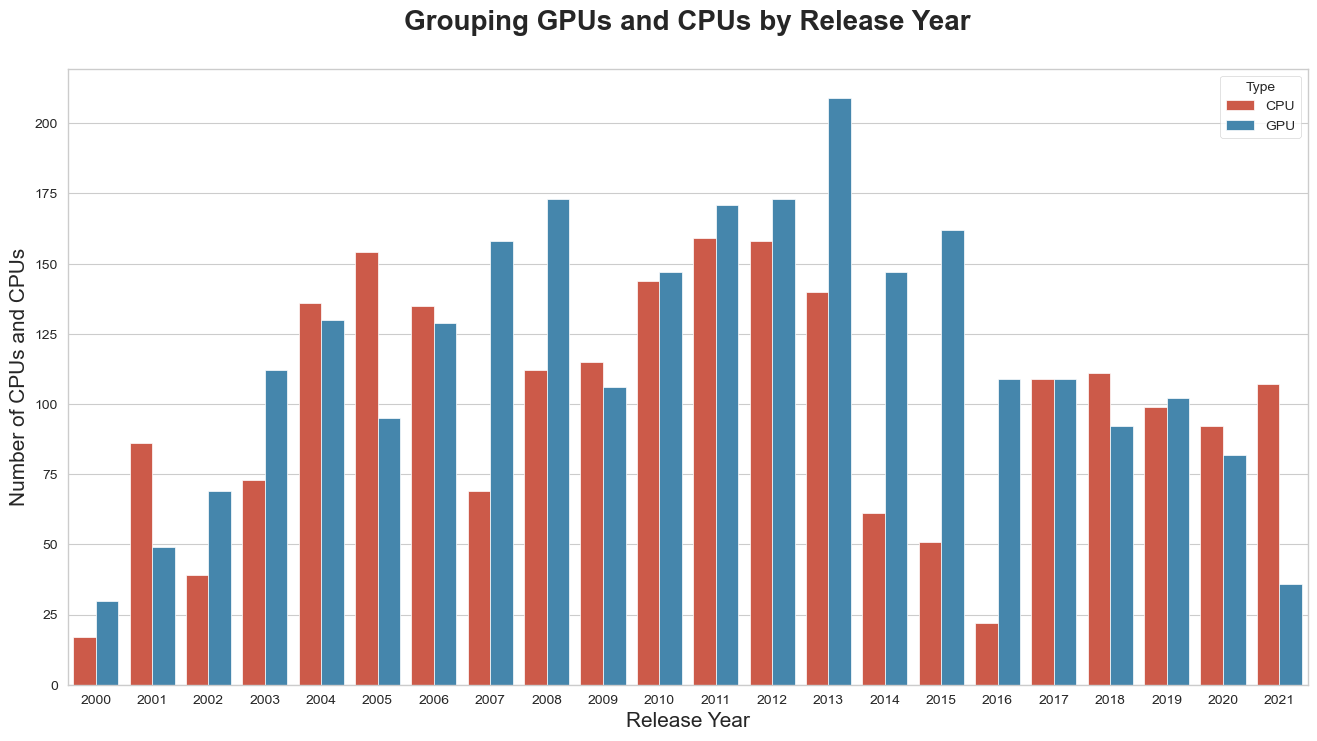

In [14]:
# Plotting GPU release dates over time

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.countplot(x="Release_Year", data=df_no_date_missing,hue = "Type");
plt.title('Grouping GPUs and CPUs by Release Year', fontsize=20, fontweight='bold', y=1.05,)
plt.ylabel('Number of CPUs and CPUs', fontsize=15)
plt.xlabel('Release Year', fontsize=15)
plt.show()

In [37]:
df_no_date_missing[["Release_Date","Process_Size_nm","TDP_W","Die_Size_mm^2","Transistors_million","Freq_MHz"]].corr(method='pearson')

,Release_Date,Process_Size_nm,TDP_W,Die_Size_mm^2,Transistors_million,Freq_MHz
Release_Date,1.000000,-0.896039,0.190870,0.283540,0.567563,0.236804
Process_Size_nm,-0.896039,1.000000,-0.157247,-0.227244,-0.411093,-0.276808
TDP_W,0.190870,-0.157247,1.000000,0.675880,0.472762,0.100695
Die_Size_mm^2,0.283540,-0.227244,0.675880,1.000000,0.635507,0.014756
Transistors_million,0.567563,-0.411093,0.472762,0.635507,1.000000,0.017550
Freq_MHz,0.236804,-0.276808,0.100695,0.014756,0.017550,1.000000


In [38]:
# Separate GPU and CPU data
gpu_data = df_no_date_missing[df_no_date_missing['Type'] == 'GPU']
cpu_data = df_no_date_missing[df_no_date_missing['Type'] == 'CPU']

# Compute correlations separately for GPU
gpu_corr = gpu_data[["Release_Date","Process_Size_nm","TDP_W","Die_Size_mm^2","Transistors_million","Freq_MHz","FP16_GFLOPS","FP32_GFLOPS","FP64_GFLOPS"]].corr(method='pearson')

# Compute correlations separately for CPU
cpu_corr = cpu_data[["Release_Date","Process_Size_nm","TDP_W","Die_Size_mm^2","Transistors_million","Freq_MHz"]].corr(method='pearson')

In [40]:
gpu_corr

,Release_Date,Process_Size_nm,TDP_W,Die_Size_mm^2,Transistors_million,Freq_MHz,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPS
Release_Date,1.000000,-0.906678,0.198651,0.320944,0.563760,0.714349,0.330895,0.532875,0.195869
Process_Size_nm,-0.906678,1.000000,-0.193503,-0.265478,-0.411847,-0.663996,-0.362181,-0.463474,-0.217797
TDP_W,0.198651,-0.193503,1.000000,0.728909,0.475138,0.414428,0.644146,0.513950,0.397219
Die_Size_mm^2,0.320944,-0.265478,0.728909,1.000000,0.690531,0.373558,0.693573,0.655181,0.567927
Transistors_million,0.563760,-0.411847,0.475138,0.690531,1.000000,0.521114,0.808191,0.860470,0.694914
Freq_MHz,0.714349,-0.663996,0.414428,0.373558,0.521114,1.000000,0.270261,0.578439,0.190451
FP16_GFLOPS,0.330895,-0.362181,0.644146,0.693573,0.808191,0.270261,1.000000,0.726382,0.692080
FP32_GFLOPS,0.532875,-0.463474,0.513950,0.655181,0.860470,0.578439,0.726382,1.000000,0.534128
FP64_GFLOPS,0.195869,-0.217797,0.397219,0.567927,0.694914,0.190451,0.692080,0.534128,1.000000


In [39]:
cpu_corr

,Release_Date,Process_Size_nm,TDP_W,Die_Size_mm^2,Transistors_million,Freq_MHz
Release_Date,1.000000,-0.895381,0.195964,0.171520,0.690487,0.355989
Process_Size_nm,-0.895381,1.000000,-0.117763,-0.151871,-0.512994,-0.360738
TDP_W,0.195964,-0.117763,1.000000,0.410857,0.432120,0.330102
Die_Size_mm^2,0.171520,-0.151871,0.410857,1.000000,0.209500,0.262389
Transistors_million,0.690487,-0.512994,0.432120,0.209500,1.000000,0.196992
Freq_MHz,0.355989,-0.360738,0.330102,0.262389,0.196992,1.000000


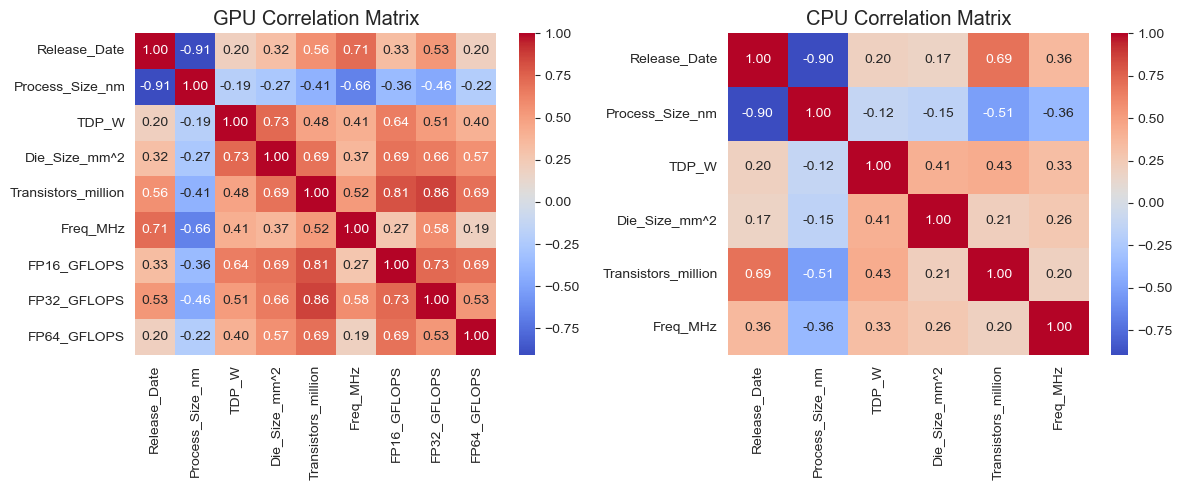

In [41]:
# Set up subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for GPU correlation matrix
sns.heatmap(gpu_corr, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title('GPU Correlation Matrix')

# Heatmap for CPU correlation matrix
sns.heatmap(cpu_corr, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('CPU Correlation Matrix')

plt.tight_layout()
plt.show()

In [20]:
#Note that GFLOPS only correlates to GPU not CPU 

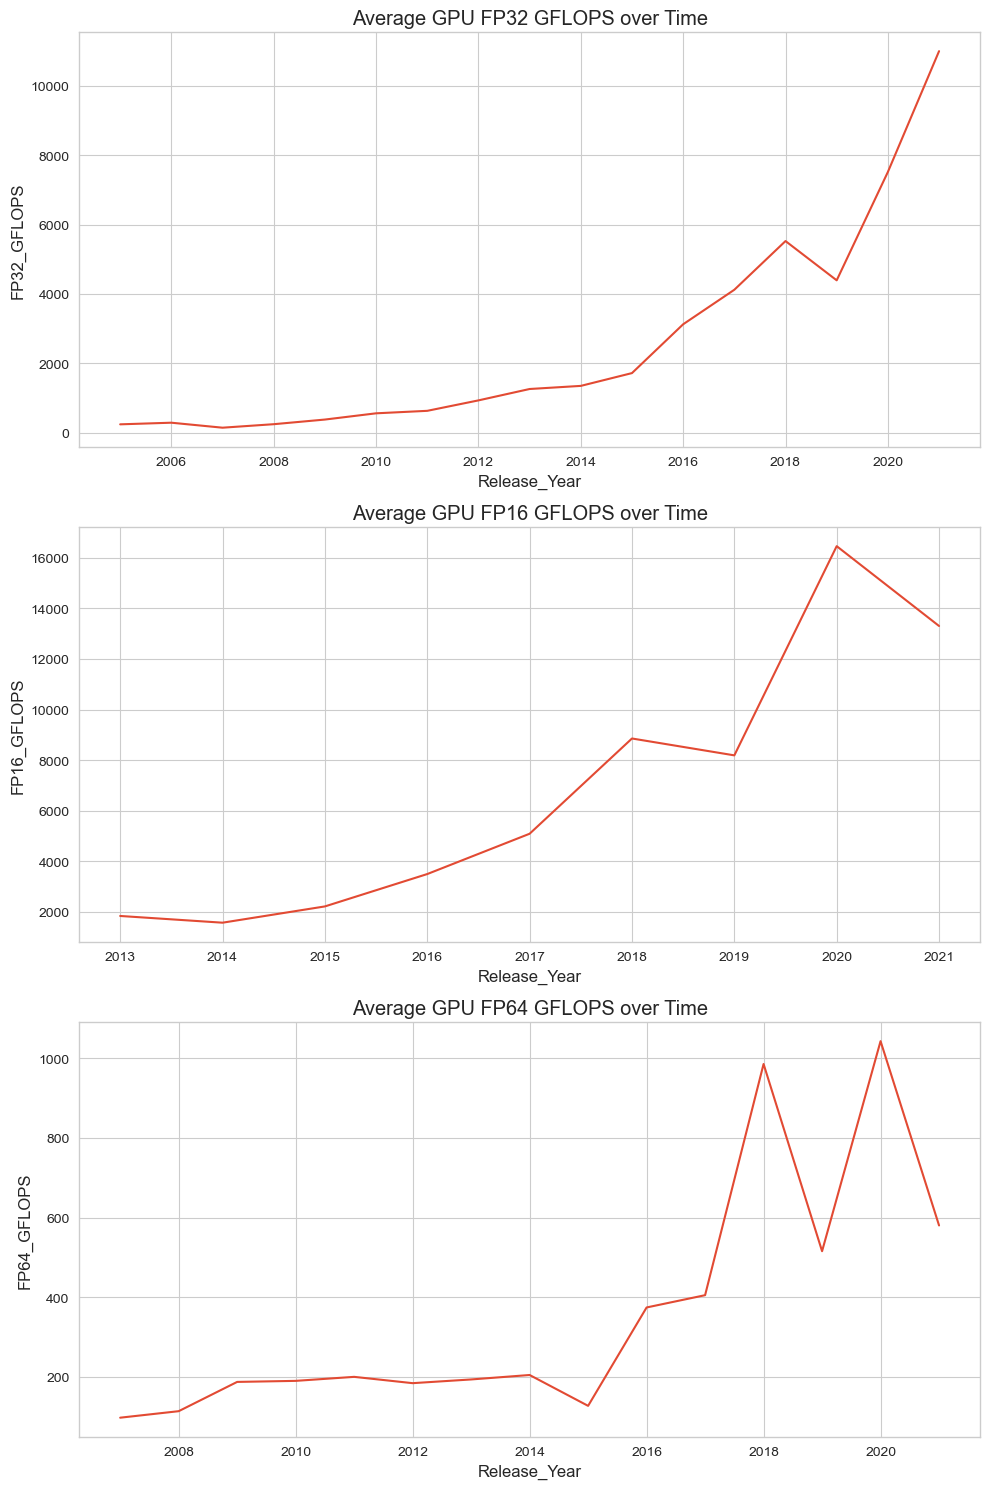

In [42]:
# Calculate annual average GFLOPS for each type
annual_avg_fp32 = gpu_data.groupby(['Release_Year'])['FP32_GFLOPS'].mean().reset_index()
annual_avg_fp16 = gpu_data.groupby(['Release_Year'])['FP16_GFLOPS'].mean().reset_index()
annual_avg_fp64 = gpu_data.groupby(['Release_Year'])['FP64_GFLOPS'].mean().reset_index()

# Set up subplots for multiple line plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plotting annual average FP32 GFLOPS over time
sns.lineplot(x='Release_Year', y='FP32_GFLOPS', data=annual_avg_fp32, ax=axes[0])
axes[0].set_title('Average GPU FP32 GFLOPS over Time')

# Plotting annual average FP16 GFLOPS over time
sns.lineplot(x='Release_Year', y='FP16_GFLOPS', data=annual_avg_fp16, ax=axes[1])
axes[1].set_title('Average GPU FP16 GFLOPS over Time')

# Plotting annual average FP64 GFLOPS over time
sns.lineplot(x='Release_Year', y='FP64_GFLOPS', data=annual_avg_fp64, ax=axes[2])
axes[2].set_title('Average GPU FP64 GFLOPS over Time')

plt.tight_layout()
plt.show()

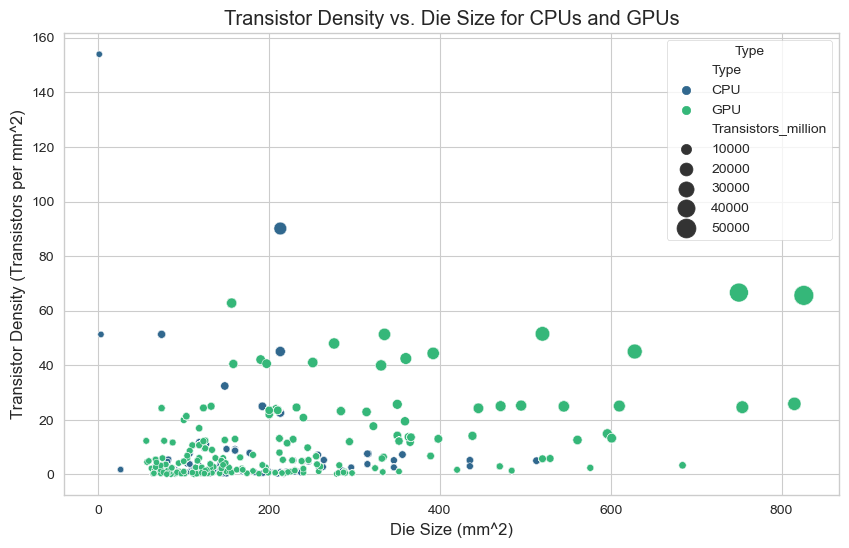

In [43]:
# Calculate transistor density (Transistors per mm^2)
df_no_date_missing['Transistor_Density'] = df_no_date_missing['Transistors_million'] / df_no_date_missing['Die_Size_mm^2']

# Create a scatter plot for both CPUs and GPUs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Die_Size_mm^2', y='Transistor_Density', hue='Type', size='Transistors_million', sizes=(20, 200), palette='viridis', data=df_no_date_missing)

# Set labels and title
plt.xlabel('Die Size (mm^2)')
plt.ylabel('Transistor Density (Transistors per mm^2)')
plt.title('Transistor Density vs. Die Size for CPUs and GPUs')

# Show legend
plt.legend(title='Type')

# Show the plot
plt.show()

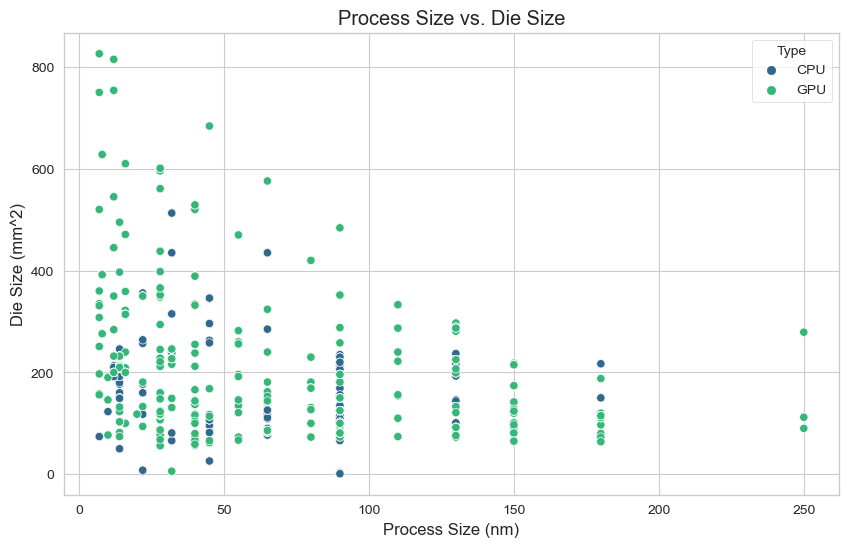

In [44]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Process_Size_nm', y='Die_Size_mm^2', data=df_no_date_missing, hue='Type', palette='viridis')

# Set labels and title
plt.xlabel('Process Size (nm)')
plt.ylabel('Die Size (mm^2)')
plt.title('Process Size vs. Die Size')

# Show legend
plt.legend(title='Type')

# Show the plot
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
year_arr = df_no_date_missing.sort_values("Release_Year")["Release_Year"].unique()
year_arr

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [47]:
# Feature to predict (e.g., 'Transistors (million)')
#feature_to_predict = 'Transistors_(million)

# Numpy array that holds unique release year values
year_arr = df_no_date_missing.sort_values("Release_Year")["Release_Year"].unique()
# Numpy array that holds mean values of GPUs memory for each year
Transistors_arr_mean = df_no_date_missing.groupby('Release_Year')['Transistors_million'].mean().values
# Numpy array that holds median values of GPUs memory for each year
Transistors_arr_median = df_no_date_missing.groupby('Release_Year')['Transistors_million'].median().values

# Minimal value of release year from dataset
year_min = year_arr[0]
# Median size of memory in year_min
memory_min = Transistors_arr_median[0]

In [48]:
year_arr

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

<Figure size 1200x800 with 0 Axes>

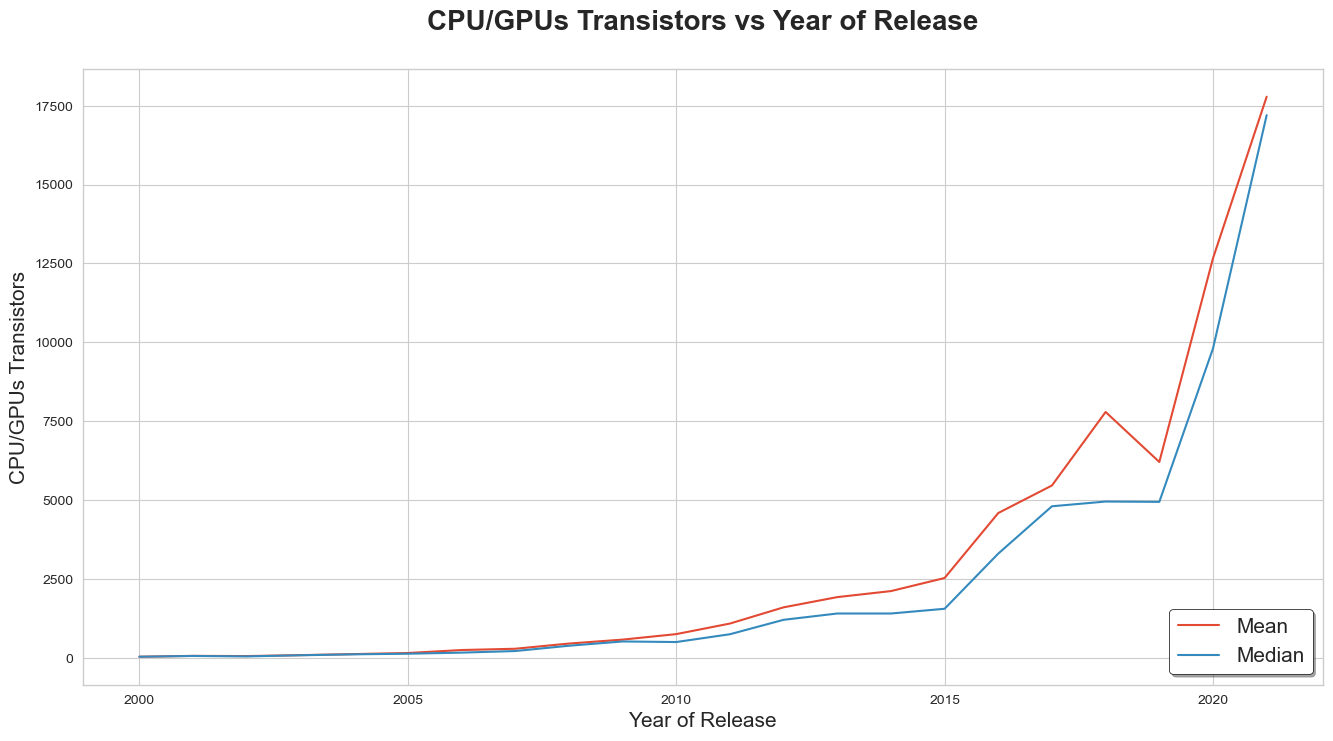

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [49]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('CPU/GPUs Transistors vs Year of Release', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('CPU/GPUs Transistors', fontsize=15)
sns.set_style("whitegrid")
plt.plot(year_arr, Transistors_arr_mean, label="Mean")
plt.plot(year_arr, Transistors_arr_median, label="Median")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()
year_arr

C:\Users\niyaz\AppData\Local\Temp\ipykernel_4404\3642177646.py:10: RuntimeWarning:

overflow encountered in power



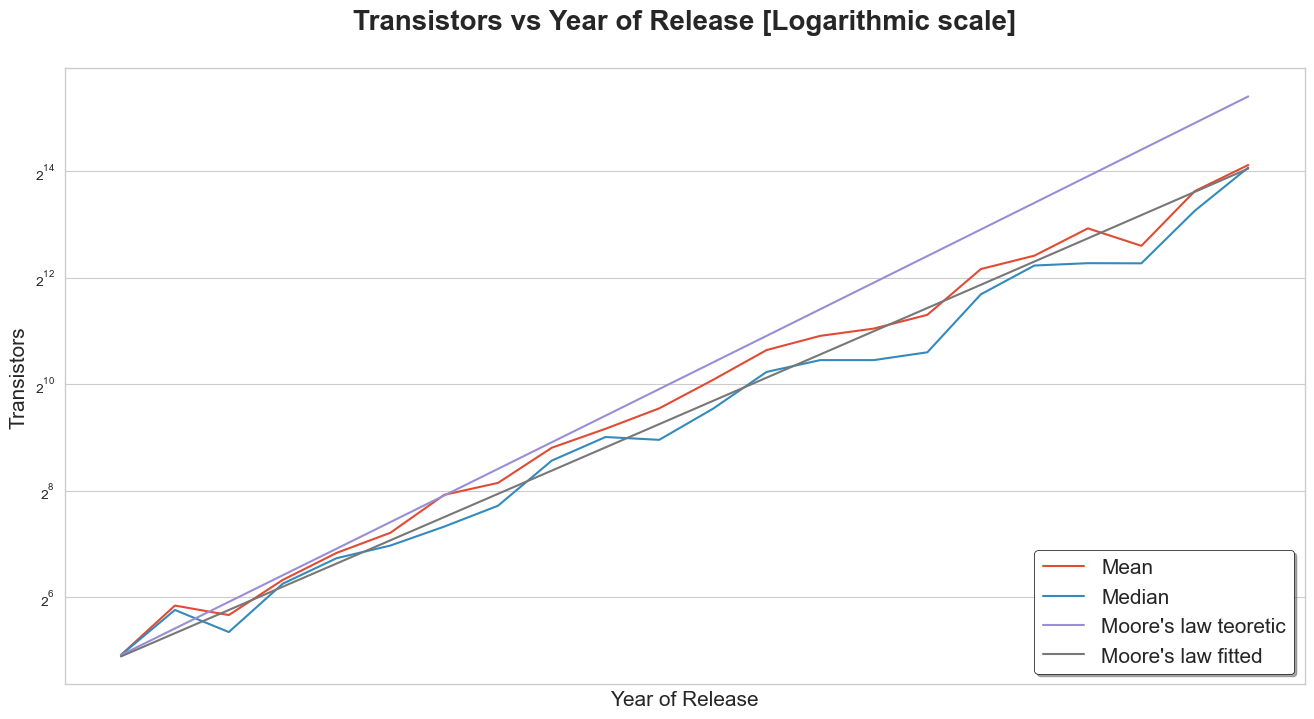

In [50]:
# Short function to calculate transistors based on Moore's Law
def calculateTransistorsMoore(x, y_trans, initial_transistors):
    return initial_transistors * 2 ** ((x - y_trans) / 2)

# Transistors calculation based on Moore's Law
y_pred_moore_law_teoretic = calculateTransistorsMoore(year_arr, int(year_arr[0]), Transistors_arr_median[0])

# Fitting exponential curve to dataset
def exponentialCurve(x, a, b, c):
    return a * 2 ** ((x - c) * b)

# Curve fitting using scipy's curve_fit
popt, pcov = curve_fit(exponentialCurve, year_arr, Transistors_arr_mean, p0=(2, 0.5, 2000))
y_pred_moore_law_fitted = exponentialCurve(year_arr, *popt)

# Plotting
plt.figure(figsize=(16, 8))
plt.title('Transistors vs Year of Release [Logarithmic scale]', fontsize=20, fontweight='bold', y=1.05)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('Transistors', fontsize=15)
sns.set_style("whitegrid")
plt.loglog(year_arr, Transistors_arr_mean, label="Mean", base=2)
plt.loglog(year_arr, Transistors_arr_median, label="Median", base=2)
plt.loglog(year_arr, y_pred_moore_law_teoretic, label="Moore's law teoretic", base=2)
plt.loglog(year_arr, y_pred_moore_law_fitted, label="Moore's law fitted", base=2)
plt.legend(loc=4, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [51]:
# Check the length of both arrays
length_year_arr = len(year_arr)
length_transistors_arr_mean = len(Transistors_arr_mean)
print(f"Length of year_arr: {length_year_arr}")
print(f"Length of transistors_arr_mean: {length_transistors_arr_mean}")
Transistors_arr_mean

Length of year_arr: 22
Length of transistors_arr_mean: 22


array([   30.04545455,    57.18796992,    50.53773585,    79.84530387,
         113.56573705,   147.67094017,   241.99156118,   282.75      ,
         446.96138996,   572.21719457,   746.5       ,  1081.2625    ,
        1595.48398577,  1919.78864353,  2110.87292818,  2525.4875    ,
        4585.56074766,  5459.1483871 ,  7789.74193548,  6204.72297297,
       12660.56179775, 17785.        ])

In [52]:
year_arr

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Fitting Polynomial Regression to the dataset
poly_reg_2 = PolynomialFeatures(degree = 2, include_bias=False)
poly_reg_3 = PolynomialFeatures(degree = 3, include_bias=False)

X_poly_2 = poly_reg_2.fit_transform(year_arr.reshape(-1, 1))
X_poly_3 = poly_reg_3.fit_transform(year_arr.reshape(-1, 1))

lin_reg_2 = LinearRegression()
lin_reg_3 = LinearRegression()

lin_reg_2.fit(X_poly_2, Transistors_arr_mean)
lin_reg_3.fit(X_poly_3, Transistors_arr_mean)

y_pred_lin_reg_2 = lin_reg_2.predict(poly_reg_2.fit_transform(year_arr.reshape(-1, 1)))
y_pred_lin_reg_3 = lin_reg_3.predict(poly_reg_3.fit_transform(year_arr.reshape(-1, 1)))

In [54]:
from sklearn.metrics import r2_score

# 2nd degree curve
score = r2_score(y_pred_lin_reg_2, Transistors_arr_mean)
print("r2 of 2nd degree curve is equal " + str(round(score, 3)))
# 3rd degree curve
score = r2_score(y_pred_lin_reg_3, Transistors_arr_mean)
print("r2 of 3rd degree curve is equal " + str(round(score, 3)))
# Teoretic Moore's Law curve
score = r2_score(y_pred_moore_law_teoretic, Transistors_arr_mean)
print("r2 of Teoretic Moore's Law curve is equal " + str(round(score, 3)))
# Fitted Moore's Law curve
score = r2_score(y_pred_moore_law_fitted, Transistors_arr_mean)
print("r2 of Fitted Moore's Law curve is equal " + str(round(score, 3)))

r2 of 2nd degree curve is equal 0.875
r2 of 3rd degree curve is equal 0.951
r2 of Teoretic Moore's Law curve is equal 0.52
r2 of Fitted Moore's Law curve is equal 0.972


In [55]:
import plotly.offline as py
import plotly.graph_objs as go

X_grid = np.arange(min(year_arr), max(year_arr) + 5, 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

y_pred_lin_reg_2 = lin_reg_2.predict(poly_reg_2.fit_transform(X_grid))
y_pred_lin_reg_3 = lin_reg_3.predict(poly_reg_3.fit_transform(X_grid))

X_grid = X_grid.flatten()

y_pred_moore_law_teoretic = calculateTransistorsMoore(X_grid, int(year_min),Transistors_arr_median[0])
y_pred_moore_law_fitted = exponentialCurve(X_grid, *popt)

trace1 = go.Scatter(
    x = X_grid,
    y = y_pred_lin_reg_2,
    mode = 'lines',
    name = '2nd degree polynomial'
)
trace2 = go.Scatter(
    x = X_grid,
    y = y_pred_lin_reg_3,
    mode = 'lines',
    name = '3rd degree polynomial'
)
trace3 = go.Scatter(
    x = X_grid,
    y = y_pred_moore_law_teoretic,
    mode = 'lines',
    name = "Teoretic Moore's Law curve"
)
trace4 = go.Scatter(
    x = X_grid,
    y = y_pred_moore_law_fitted,
    mode = 'lines',
    name = "Fitted Moore's Law curve"
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Fitting regression model into dataset',
    width=1000,
    height=500,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    yaxis = dict(title= 'Processor Size'),
    xaxis = dict(title= 'Year of Release'),
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='#FFFFFF',
        borderwidth=2
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [56]:
 Transistor_2030 = exponentialCurve(2030, *popt)

In [57]:
print("Predicted mean Transistor size in 2025 is " + str(round(int(Transistor_2030))) +" Million")

Predicted mean Transistor size in 2025 is 258459 Million
